### Task
1. Import pandas, numpy, matplotlib.pyplot
2. Read 'premium.csv' using pandas.
3. Scatter plot the data.

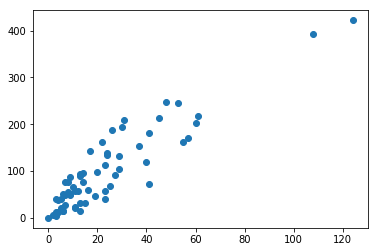

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('premium.csv')
plt.scatter(df['X'],df['Y'])
plt.show()

### Task 
1. Find the mean for X and Y.

In [2]:
mean_x=np.mean(df['X'])
mean_y=np.mean(df['Y'])
print("mean_x: %.4f, mean_y: %.4f"%(mean_x,mean_y))

mean_x: 22.9048, mean_y: 98.1873


### Task
1. Find the variance of X and Y.
2. Find the covariance of them.

In [3]:
var_x = np.var(df['X'],ddof=1)
var_y = np.var(df['Y'],ddof=1)
cov = np.cov(df['X'],df['Y'],ddof=1)[0,1]
print("variance _x: %.4f, variance_y: %.4f, covariance: %.4f"%(var_x,var_y,cov))

variance _x: 545.3134, variance_y: 7626.1014, covariance: 1861.6036


### Task
1. Now look for the slope (b1) and the y-intercept (b0).

In [4]:
# coefficients
b1 = cov/float(var_x)
b0 = mean_y-(b1*mean_x)
print("b0: %.4f, b1: %.4f"%(b0,b1))

b0: 19.9945, b1: 3.4138


### Task
1. Caluculate the predicted premium.
2. Attach it to the right end of the dataframe.

In [5]:
df['Predicted_Premium']=df['X']*b1+b0
df

,X,Y,Predicted_Premium
0,108,392.5,388.687430
1,19,46.2,84.857133
2,13,15.7,64.374192
3,124,422.2,443.308607
4,40,119.4,156.547428
5,57,170.9,214.582429
6,23,56.9,98.512428
7,14,77.5,67.788016
8,45,214.0,173.616546
9,10,65.3,54.132721


### Task
1. Scatter plot the dataframe, one with 'Y', the other with 'Predicted_Premium'.

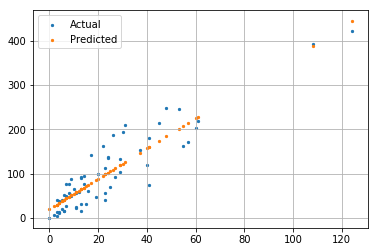

In [6]:
plt.scatter(df['X'],df['Y'],label='Actual',s=5)
plt.scatter(df['X'],df['Predicted_Premium'],label='Predicted',s=5)
plt.legend()
plt.grid()
plt.show()

### Task
1. Using the given data, education and monthly_income, find the expected monthly income using linear regression.
2. Then, scatter plot them.

In [42]:
# Given
education = [6,8,11,12,12,13,14,16,16,21]
monthly_income = [1,1.5,1,2,4,2.5,5,6,10,8]

In [43]:
mean_edu = np.mean(education)
mean_income = np.mean(monthly_income)

var_1 = np.var(education,ddof=1)
cov_1 = np.cov(education, monthly_income,ddof=1)[0,1]

b_1=cov_1/float(var_1)
b_0=mean_income-(b_1*mean_edu)

predicted=[]
for i in range(len(education)):
    predicted.append(education[i]*b_1+b_0)
predicted

[-0.07642725598526745,
 1.1341313689379984,
 2.949969306322897,
 3.555248618784529,
 3.555248618784529,
 4.160527931246162,
 4.765807243707795,
 5.976365868631061,
 5.976365868631061,
 9.002762430939224]

(0, 25)

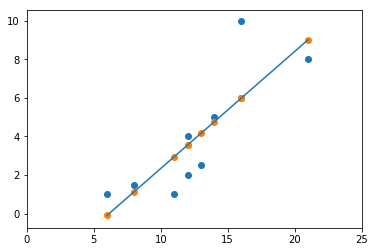

In [44]:
plt.scatter(education,monthly_income)
plt.scatter(education,predicted)
plt.plot(education,predicted)
plt.xlim(0,25)

### Extra
-- Simple linear regression using OLS (ORdinary Least Squares).

http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

-- sklearn.linear_models.LinearRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [9]:
import statsmodels.api as sm
X=df['X']
Y=df['Y']
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           2.05e-25
Time:                        17:49:22   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.003       7.261      32.728
X              3.4138      0.195     17.465      0.000       3.023       3.805
==============================================================================
Omnibus:                        1.613   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.429
Skew:                           0.364   Prob(JB):                        0.489
Kurtosis:                       2.875   Cond. No.                         45.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""